In [1]:
from sklearn.datasets import fetch_mldata
from q1 import HopfieldNetwork
import numpy as np
import random
import matplotlib.pyplot as plt

mnist = fetch_mldata('MNIST original', data_home='.cache')
targets = mnist.target.tolist()

ones = mnist.data[targets.index(1):targets.index(2)]
ones = [[1 if p > 0 else -1 for p in v] for v in ones]
ones = [(x, 1) for x in ones]

random.shuffle(ones)

fives = mnist.data[targets.index(5):targets.index(6)]
fives = [[1 if p > 0 else -1 for p in v] for v in fives]
fives = [(x, 5) for x in fives]

random.shuffle(fives)

training_set_hebb = ones[:3] + fives[:3]
training_set_sto = ones[30:230] + fives[30:230]

random.shuffle(training_set_hebb)
random.shuffle(training_set_sto)

testing_set = ones[20:30] + fives[20:30]

random.shuffle(testing_set)

In [2]:
hf_storkey = HopfieldNetwork(
    train_dataset=training_set_sto,
    mode='storkey'
)

In [3]:
hf_hebbian = HopfieldNetwork(
    train_dataset=training_set_hebb,
    mode='hebbian'
)

In [38]:
from scipy.misc import imrotate

THRESHOLD = 30

def add_noise(vector, ratio=0.2):
    indices = range(len(vector))
    num = ratio * len(indices)
    for i in range(int(num)):
        c = random.choice(indices)
        vector[c] = 1 if vector[c] == -1 else -1
        
def show(img, title='', suptitle=''):
    plt.imshow(img)
    plt.title(title)
    plt.suptitle(suptitle)
    plt.show()


def test(network, index, item, sup):
    print 'Example %s' % index
    
    image = np.array(item[0]).reshape(28, 28)
    result = np.array(network.activate(item[0])).reshape(28, 28)
    
    label = item[1]
    
    contrast = np.array(fives[0][0]).reshape(28, 28) if label == 1 else np.array(ones[0][0]).reshape(28, 28)
    
    contrast_norm = np.linalg.norm(contrast - result)
    print 'Contrast norm', contrast_norm
    attempts = [
        result, 
        imrotate(result, angle=30.), 
        imrotate(result, angle=-30.),
    ]

    best_attempt = float('inf')
    
    for r in attempts:
        for attempt in [r, np.invert(r)]:
            attempt_norm = np.linalg.norm(image - attempt)
            if attempt_norm < best_attempt:
                best_attempt = attempt_norm
        
    show(image, "Input - Example %s" % index, sup)
    show(result, "Output - Example %s" % index, sup)
    
    return best_attempt if best_attempt < contrast_norm else float('inf')


Example 0
Contrast norm 22.803508502


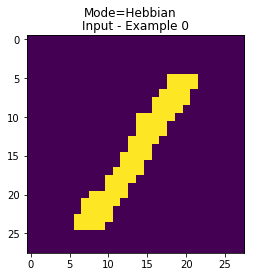

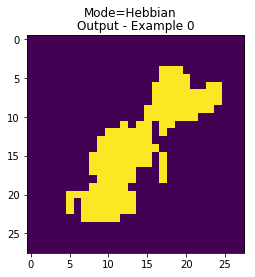

Best attempt 18.2208671583
Example 1
Contrast norm 54.881690936


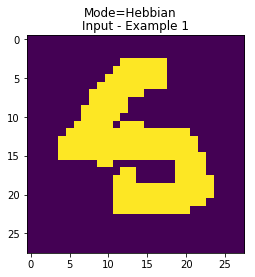

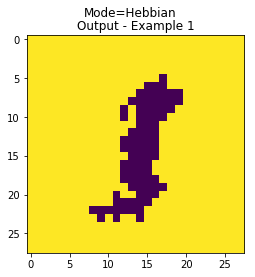

Best attempt 44.8107130048
Example 2
Contrast norm 54.0370243444


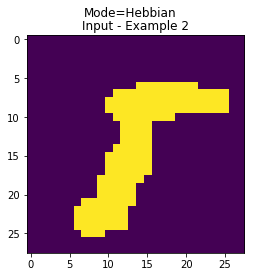

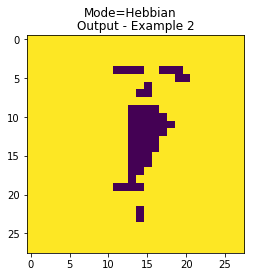

Best attempt 40.6939798988
Example 3
Contrast norm 22.2710574513


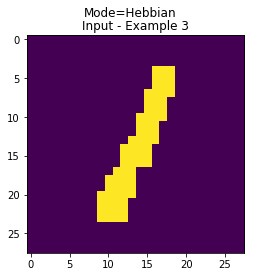

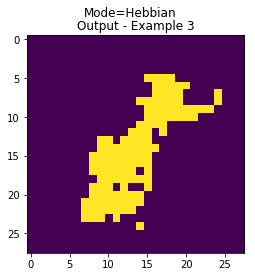

Best attempt 16.7332005307
Example 4
Contrast norm 54.881690936


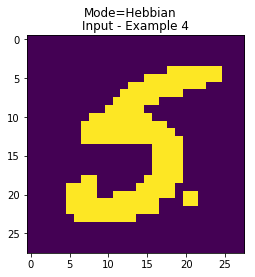

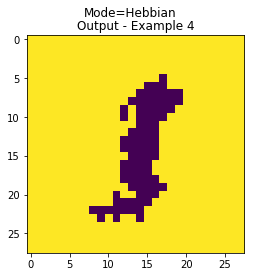

Best attempt 41.0852771683
Example 5
Contrast norm 21.6333076528


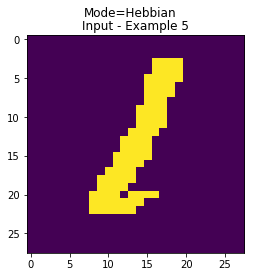

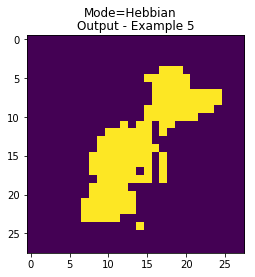

Best attempt 18.0
Example 6
Contrast norm 54.5527267879


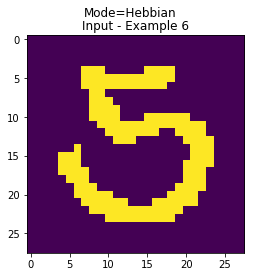

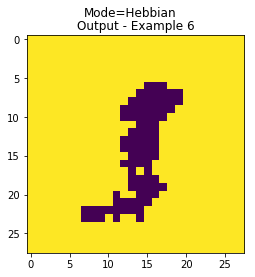

Best attempt 43.0813184571
Example 7
Contrast norm 17.2046505341


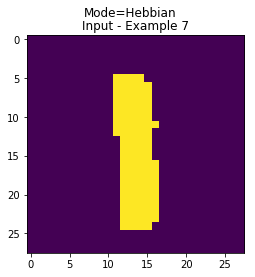

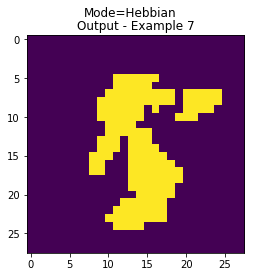

Best attempt inf
Example 8
Contrast norm 54.881690936


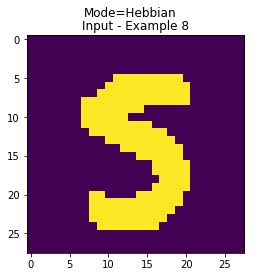

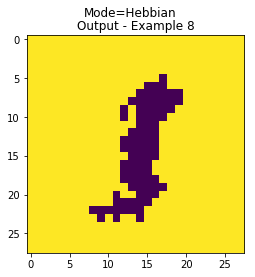

Best attempt 40.8900966005
Example 9
Contrast norm 54.881690936


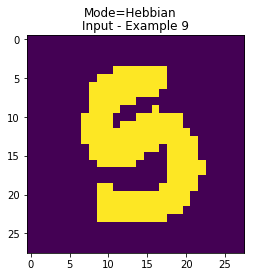

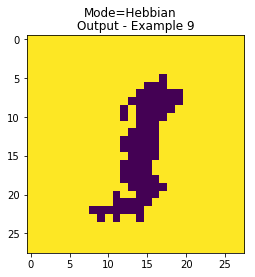

Best attempt 43.4511219648
Example 10
Contrast norm 20.7846096908


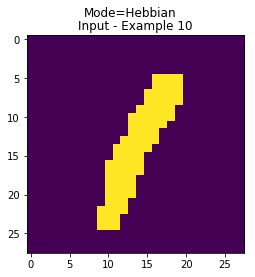

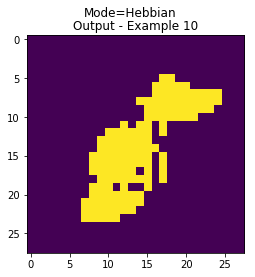

Best attempt 17.88854382
Example 11
Contrast norm 54.8087584242


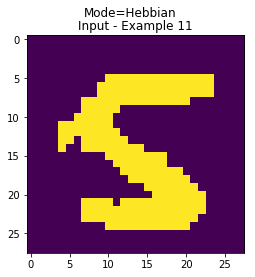

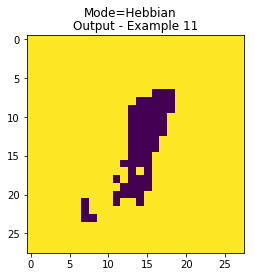

Best attempt 46.6476151588
Example 12
Contrast norm 54.6991773247


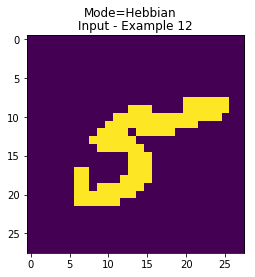

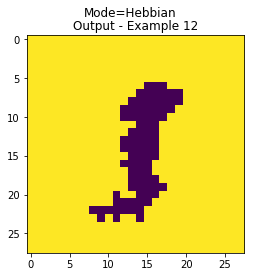

Best attempt 36.1109401705
Example 13
Contrast norm 24.5764114549


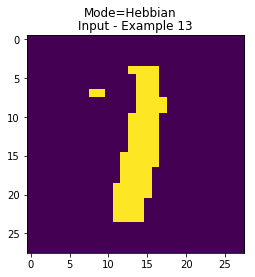

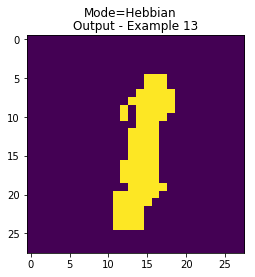

Best attempt 11.4891252931
Example 14
Contrast norm 54.881690936


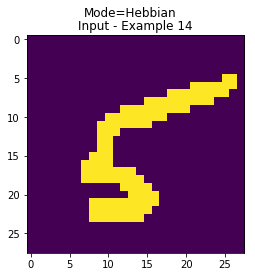

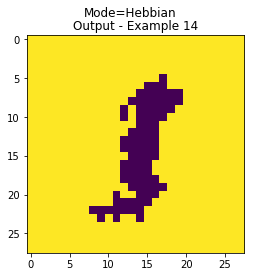

Best attempt 36.0
Example 15
Contrast norm 4.0


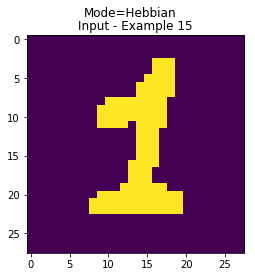

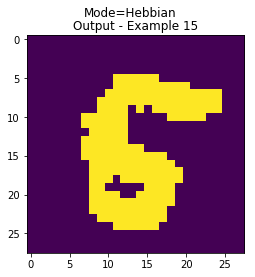

Best attempt inf
Example 16
Contrast norm 20.0997512422


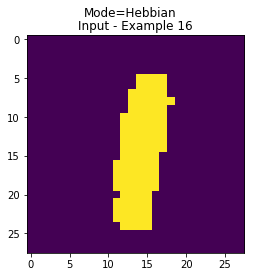

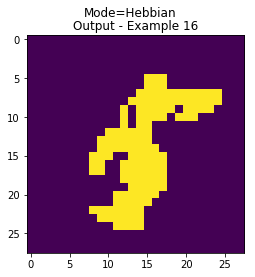

Best attempt 16.9705627485
Example 17
Contrast norm 27.9284800875


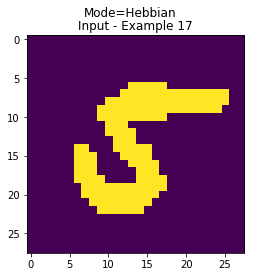

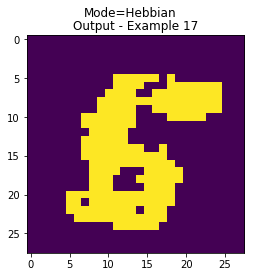

Best attempt 22.4499443206
Example 18
Contrast norm 17.3205080757


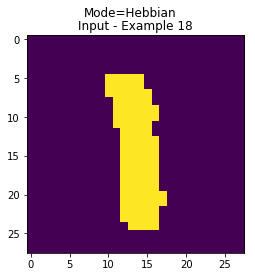

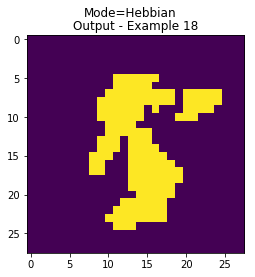

Best attempt inf
Example 19
Contrast norm 23.7486841741


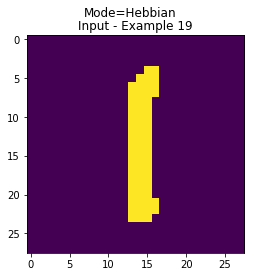

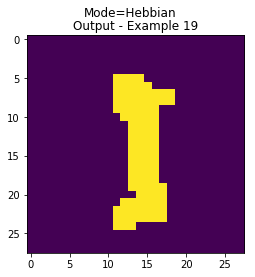

Best attempt 14.0
Accuracy of the system with hebbian: 0.4


In [39]:
hebb_acc = 0.
num_items = 20
for index, image in enumerate(testing_set):
    norm = test(hf_hebbian, index, image, "Mode=Hebbian")
    print 'Best attempt', norm

    if norm <= THRESHOLD:
        hebb_acc += 1

print "Accuracy of the system with hebbian:", (hebb_acc / len(testing_set)) 

Example 0
Contrast norm 32.3728281125


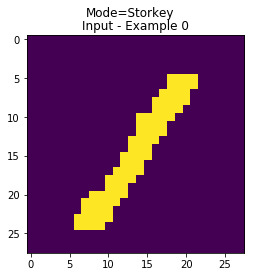

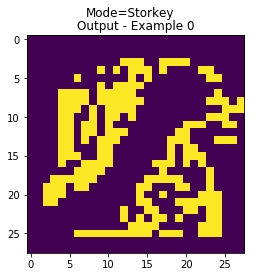

Best attempt 28.0
Example 1
Contrast norm 25.2982212813


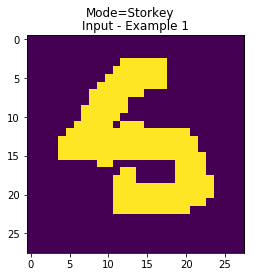

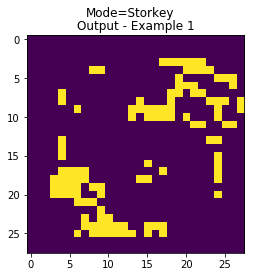

Best attempt inf
Example 2
Contrast norm 31.1126983722


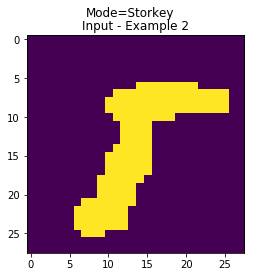

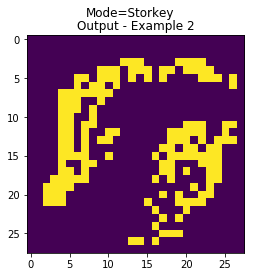

Best attempt 28.1424945589
Example 3
Contrast norm 34.1760149813


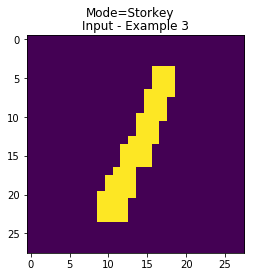

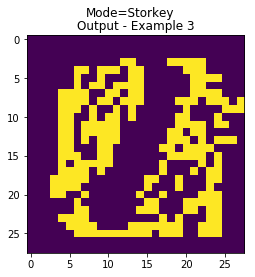

Best attempt 28.0
Example 4
Contrast norm 43.1740662898


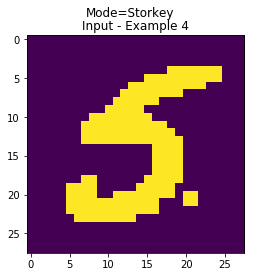

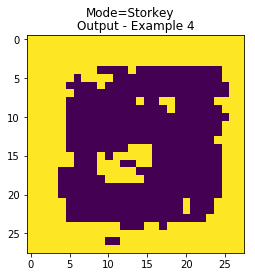

Best attempt 28.2842712475
Example 5
Contrast norm 26.6833281283


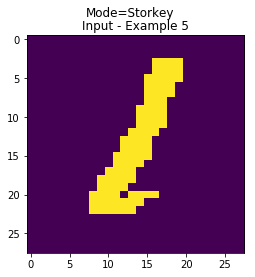

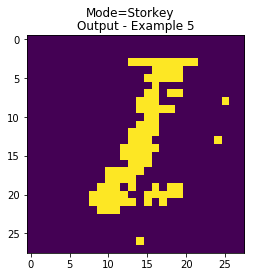

Best attempt 13.2664991614
Example 6
Contrast norm 26.83281573


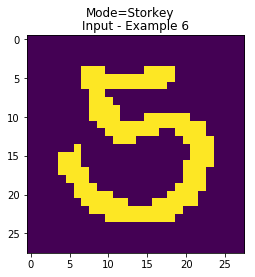

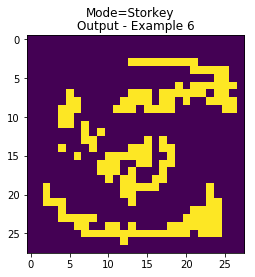

Best attempt inf
Example 7
Contrast norm 24.4948974278


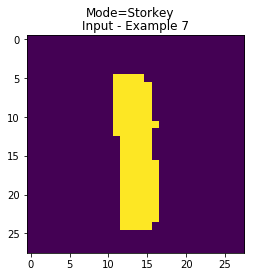

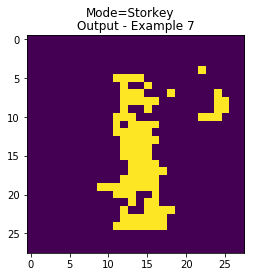

Best attempt 13.1148770486
Example 8
Contrast norm 29.4618397253


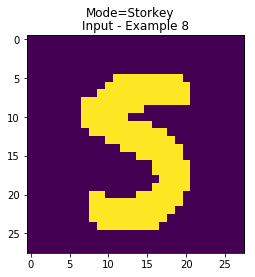

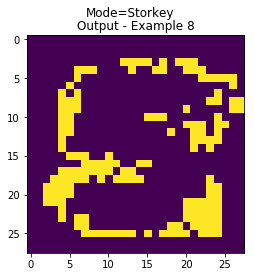

Best attempt 28.0
Example 9
Contrast norm 25.6904651573


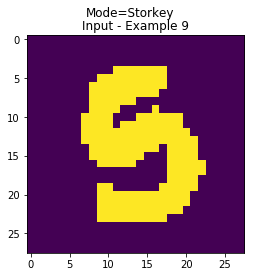

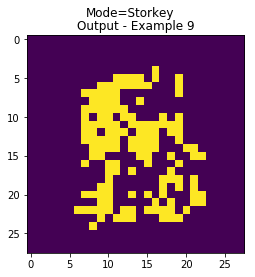

Best attempt 21.2602916255
Example 10
Contrast norm 33.8230690506


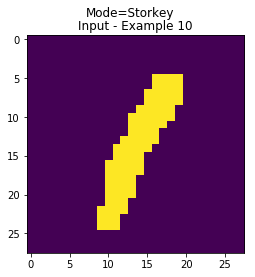

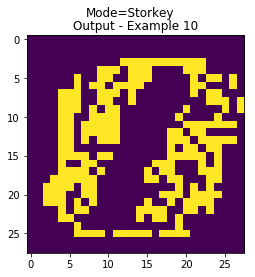

Best attempt 28.0
Example 11
Contrast norm 25.7681974535


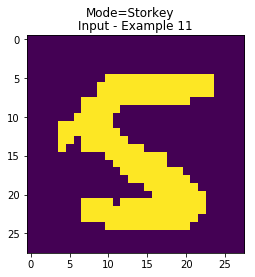

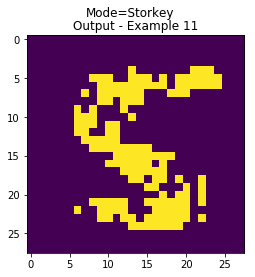

Best attempt 19.287301522
Example 12
Contrast norm 21.3541565041


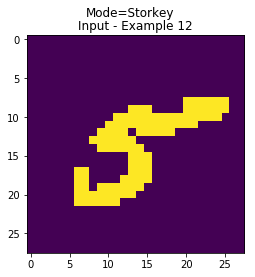

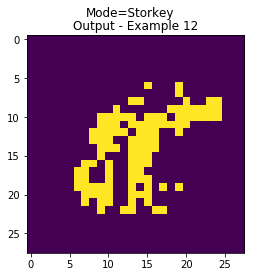

Best attempt 16.0
Example 13
Contrast norm 32.8633534503


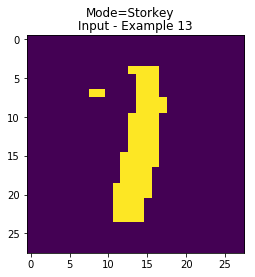

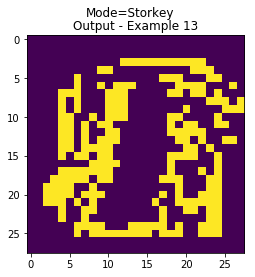

Best attempt 28.0
Example 14
Contrast norm 29.9332590942


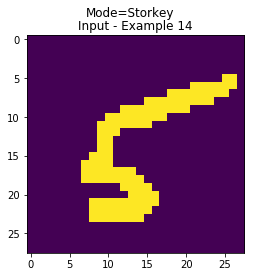

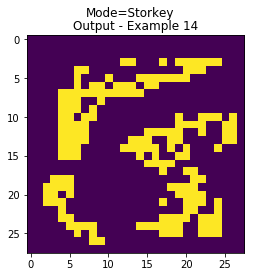

Best attempt 28.0
Example 15
Contrast norm 34.0


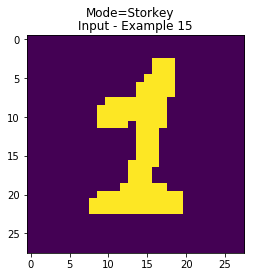

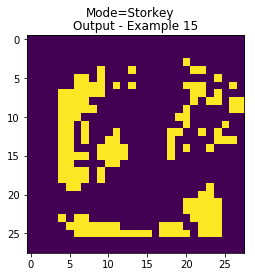

Best attempt 28.0
Example 16
Contrast norm 35.0428309359


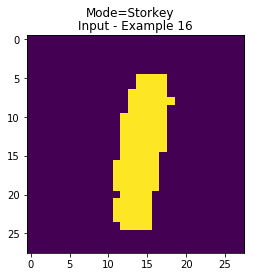

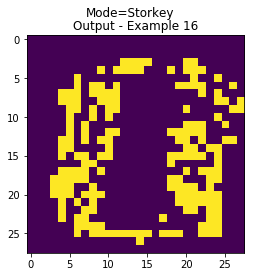

Best attempt 28.0
Example 17
Contrast norm 44.3621460256


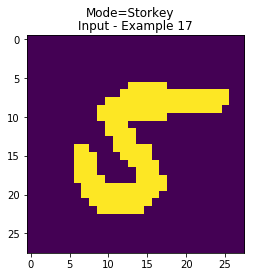

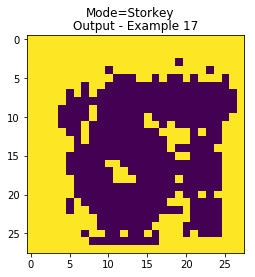

Best attempt 28.1424945589
Example 18
Contrast norm 23.8327505756


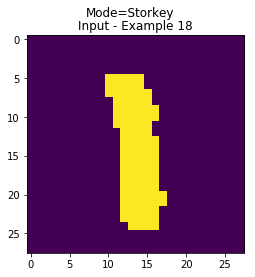

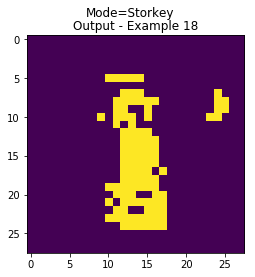

Best attempt 12.9614813968
Example 19
Contrast norm 26.0


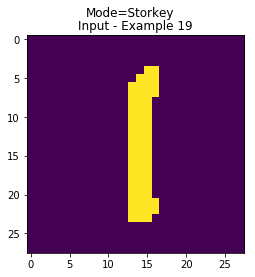

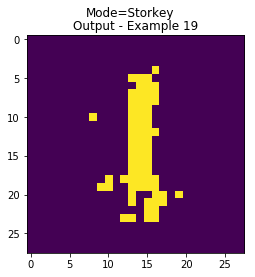

Best attempt 10.0
Accuracy of the system with storkey: 0.9


In [40]:
sto_acc = 0.

for index, image in enumerate(testing_set):
    norm = test(hf_storkey, index, image, "Mode=Storkey")
    print 'Best attempt', norm

    if norm <= THRESHOLD:
        sto_acc += 1
print "Accuracy of the system with storkey:", (sto_acc / len(testing_set))      